# 7. Edge Detection - Canny Filter

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def display_image(img, title=""):
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

**a)** Detect the edges of an image using the Canny() OpenCV function. Suggestion: use trackbars to select different
low and high threshold for the hysteresis procedure and different aperture size for the Sobel() function.

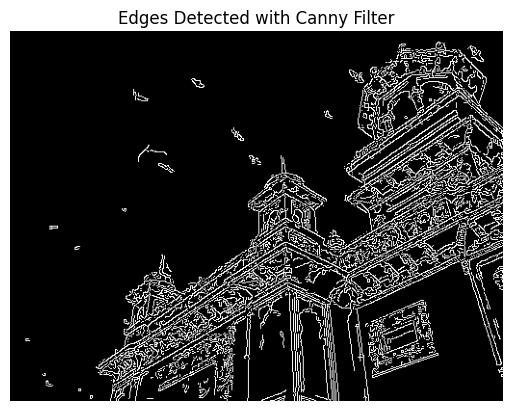

In [3]:
IMAGE_PATH = "../../images/home.jpg"

image = cv2.imread(IMAGE_PATH)

THRESHOLD_1 = 100
THRESHOLD_2 = 200
APERTURE_SIZE = 3

image_canny = cv2.Canny(image, THRESHOLD_1, THRESHOLD_2, apertureSize=APERTURE_SIZE)

display_image(image_canny, "Edges Detected with Canny Filter")

**b**) Compare the results of applying the following two filters to the same image:
- Sobel filter, with threshold t, after smoothing the image with a Gaussian blur filter with size s;
- Canny filter, with "low threshold" = "high threshold" = t and "aperture" = s,
using the same t and s values. Try also with a "low threshold" different from the "high threshold".

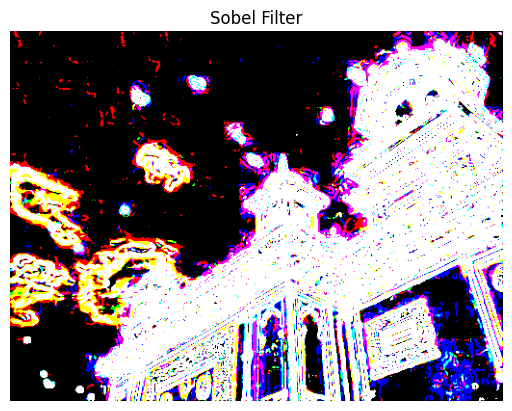

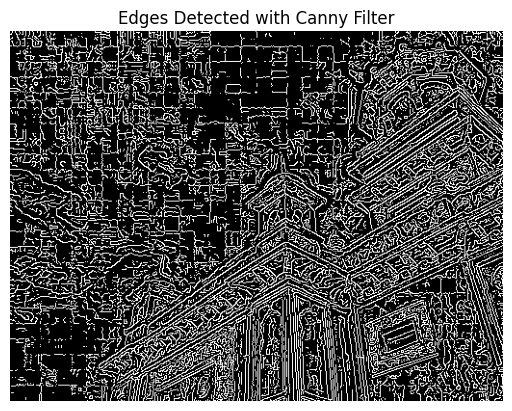

In [10]:
T = 100
S = 3
DDEPTH = 3

# Sobel filter
image_blur = cv2.GaussianBlur(image, (S, S), 0)
# Gradient X
grad_x = cv2.Sobel(image_blur, DDEPTH, 1, 0, ksize=S)

# Gradient Y
grad_y = cv2.Sobel(image_blur, DDEPTH, 0, 1, ksize=S)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

_, thresh = cv2.threshold(grad, T, 255, cv2.THRESH_BINARY)

display_image(thresh, "Sobel Filter")

# Canny filter
image_canny = cv2.Canny(image, T, T, apertureSize=S)

display_image(image_canny, "Canny Filter")